# Decision Tree Regression 

#### What is a decision tree:

1. A decision tree is a graph that uses a branching method to illustrate every possible outcome of a decision.
2. Decision Tree can cover both Regression (continuous data types, e.g. income) or Classification (Yes/No types, e.g. male vs. female) Analysis, in this example, we will be using Regression as our statistical model.
    a) if the decision tree is a continuous value, it can be split into groups – for instance, comparing values which are “above average” versus “below average”.
3. Decision trees can be drawn by hand or created with a graphics program or specialized software. In this case, we use python to illustrate the model from our dataset.
    a) Variables in a decision tree are usually represented by circles. 
4. In addition to being one of the most commonly known algorithms in machine learning, Decision Tree can also be used within data science for data mining, to simplify complex strategic challenges and evaluate the cost-effectiveness of research and business decisions.

<b>When should you use a Decision Tree?</b>

    - When it is imperative for the humans to understand and communicate the model.
    - When you’d like to make minimalistic assumptions from the dataset.
    - When you don’t want to normalize the data.
    - When the dataset contains ample amount of noise (but not too much).
    - Presence of Skewed variables in the dataset.
    - When there are many missing attribute values in the dataset.
    - When disjunctive descriptions are required
    - When you need to build and test fast
    - When the dataset is small in size

<b>Advantages of Decision Tree in both Classification and Regression (CART)</b>

    1. Simple to understand, interpret, visualize.
    2. Decision trees implicitly perform variable screening or feature selection.
    3. Can handle both numerical and categorical data. Can also handle multi-output problems.
    4. Decision trees require relatively little effort from users for data preparation.
    5. Nonlinear relationships between parameters do not affect tree performance.
    
<b>Disadvantages of Decision Tree in both Classification and Regression (CART)</b>    

    1. Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
    2. Decision trees can be unstable because small variations in the data might result in a completely different tree being    
       generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
    3. Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training  
       multiple trees, where the features and samples are randomly sampled with replacement.
    4. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data 
       set prior to fitting with the decision tree.

<b>Algorithm - Decision Tree </b>

    - There are many algorithms out there which construct Decision Trees, but one of the best is called ID3 Algorithm. ID3   
      Stands for Iterative Dichotomiser 3. 
    - The ID3 algorithm builds the tree top-down, starting from the root by meticulously choosing which attribute that willbe tested at each given node. 
    - Each attribute is evaluated through statistical means as to see which attribute splits the dataset the best.
    - The best attribute is made the root, with it’s attribute values branching out.
    - The process continues with the rest of the attributes. Once an attribute is selected, it is not possible to backtrack.
    
<b>Attributes</b>

    - Entropy: is the measure of the amount of uncertainty or randomness in data.
    - Information gain: it measures the relative change in entropy with respect to the independent variables.
    
<b>Diagram of a Decision Tree</b>

<img src="Resources/DecisionTreeWithData.png" width=750, height=800>

### Import Python Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt

### Import the Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset # prints the dataset in a nice table format

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Split the dataset into the independent variable X, and dependent variable y.

In [3]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [4]:
print(X) # print values of X

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y) # print values of y

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Fitting the decision tree into the dataset

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
# X is our matrix of features (independent variable) and y is our dependant variable
regressor.fit(X, y) # default parameters will show

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

### Prediciting whether or not a potential employee with position level (6.5) had a salaray of 160,000 dollares based on the dataset obtained from previous employer.

In [7]:
y_pred = regressor.predict(6.5) # 
print(y_pred) # prints th epredicted salary of 150,000 dollares, very close to the amount indicated by the potential employer

[ 150000.]


### Visualizing the Decision Tree Regression with Higher Resolution and Smoother Curve in 1-dimensional Graph

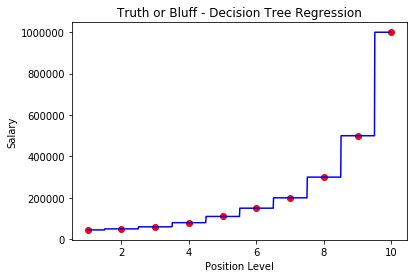

In [8]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff - Decision Tree Regression')
plt.ylabel('Salary')
plt.xlabel('Position Level')
plt.show()

Note: for the above graph the red dots are the Average for each position level, and as you can see, the position level of 6.5 shows to align with 150,000 salary.